### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.stattools as sts

### Criando funções

In [3]:
def testenormal(x):
    e,p=stats.shapiro(x)
    if p>=0.05:
        return "A serie é normal"
    else:
        return "A serie NAO é normal"

In [4]:
def testeestacionaria(x):
    kpss=sts.kpss(x)
    teste=kpss[0]
    valorcritico=kpss[3]['5%']
    if teste>valorcritico:
        return "A serie NAO é estacionaria"
    else:
        return "A serie é estacionaria"

### Questões - Exercicio 01

1. Você recebeu um dataset chamado 'Electric_Production.csv'. Ele apresenta os dados de produção elétrica em diversos momentos. Crie um dataframe df com este dado. 

In [5]:
# Carregando a série temporal
series1 = pd.read_csv('..\datasets\Electric_Production.csv')
series1.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
series1['DATE']=pd.to_datetime(series1['DATE'])
series1.set_index('DATE', inplace=True)
series1

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


a. Como a produção evoluiu no tempo ? Crie gráficos apresentando algumas médias móveis.

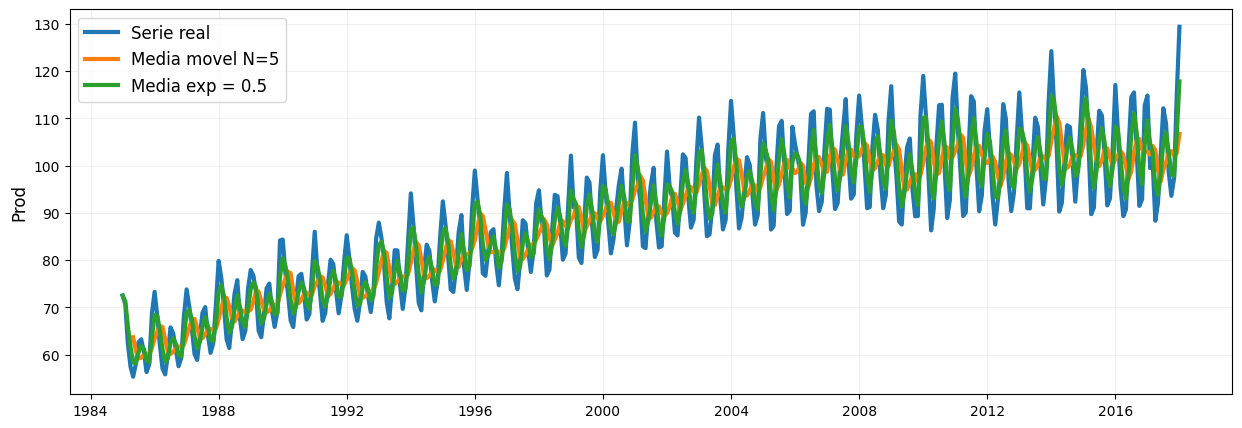

In [34]:
plt.figure(figsize=(15,5))
plt.plot(series1,lw=3,label='Serie real')
plt.plot(series1.rolling(5).mean(),lw=3,label='Media movel N=5')
plt.plot(series1.ewm(alpha=0.5).mean(),lw=3,label='Media exp = 0.5')
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.ylabel('Prod',fontsize=12)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)

b. O dado é estacionário?

In [8]:
testeestacionaria(series1)

C:\Users\caios\AppData\Local\Temp\ipykernel_1840\1211589283.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss=sts.kpss(x)


'A serie NAO é estacionaria'

c. O dado apresenta uma distribuição normal?

In [9]:
testenormal(series1)

'A serie NAO é normal'

2. Você recebeu um dataset chamado 'movimentacao_rodoviaria.csv'. Ele apresenta a quantidade de pessoas estimadas nas rodoviárias. Crie um dataframe df com este dado. 

In [22]:
# Carregando a série temporal
series2 = pd.read_csv('..\datasets\movimentacao_rodoviaria.csv', header=None)
series2

,0,1,2,3
0,jan,JOAO THOMÉ,2012,146120.00
1,jan,JOAO THOMÉ,2013,146405.00
2,jan,JOAO THOMÉ,2014,184145.00
3,jan,JOAO THOMÉ,2015,192590.00
4,jan,JOAO THOMÉ,2016,136208.00
...,...,...,...,...
391,dez,MESSEJANA,2018,31364.38
392,dez,MESSEJANA,2019,38652.96
393,dez,MESSEJANA,2020,27195.00
394,dez,MESSEJANA,2021,26732.00


In [ ]:
## Ajustando dataframe
# Renomeando colunas
series2 = series2.rename(columns={0:'MES',1:'RODOVIARIA',2:'ANO',3:'PESSOAS'})

# Criar coluna DATA
meses_nome='jan fev mar abr mai jun jul ago set out nov dez'.split()
meses_num=np.arange(1,13)
meses_trans=dict(zip(meses_nome,meses_num))

data=[]
for i in range(len(series2)):
    numero_mes=str(meses_trans[series2['MES'].iloc[i]])
    ano=str(series2['ANO'].iloc[i])
    datacompleta=numero_mes+'-'+ano
    
    data.append(datacompleta)

series2['DATA']=data
series2['DATA']=pd.to_datetime(series2['DATA'])

# Ordenar pela data
series2=series2.sort_values('DATA').reset_index(drop=True)

# remover NaN de PESSOAS
series2 = series2.dropna(subset=['PESSOAS'])

In [24]:
series2

,MES,RODOVIARIA,ANO,PESSOAS
0,jan,JOAO THOMÉ,2012,146120.00
1,jan,JOAO THOMÉ,2013,146405.00
2,jan,JOAO THOMÉ,2014,184145.00
3,jan,JOAO THOMÉ,2015,192590.00
4,jan,JOAO THOMÉ,2016,136208.00
...,...,...,...,...
391,dez,MESSEJANA,2018,31364.38
392,dez,MESSEJANA,2019,38652.96
393,dez,MESSEJANA,2020,27195.00
394,dez,MESSEJANA,2021,26732.00


In [ ]:
# Agrupando por DATA e somando PESSOAS
series2_ajust = series2[['DATA','PESSOAS']].groupby('DATA').sum()

In [27]:
series2_ajust

,PESSOAS
DATA,
2012-01-01,206480.0
2012-02-01,187360.0
2012-03-01,187688.0
2012-04-01,195182.0
2012-05-01,180760.0
...,...
2022-04-01,154161.0
2022-05-01,158652.0
2022-06-01,205282.0


a. Crie gráficos temporal apresentando algumas médias móveis.

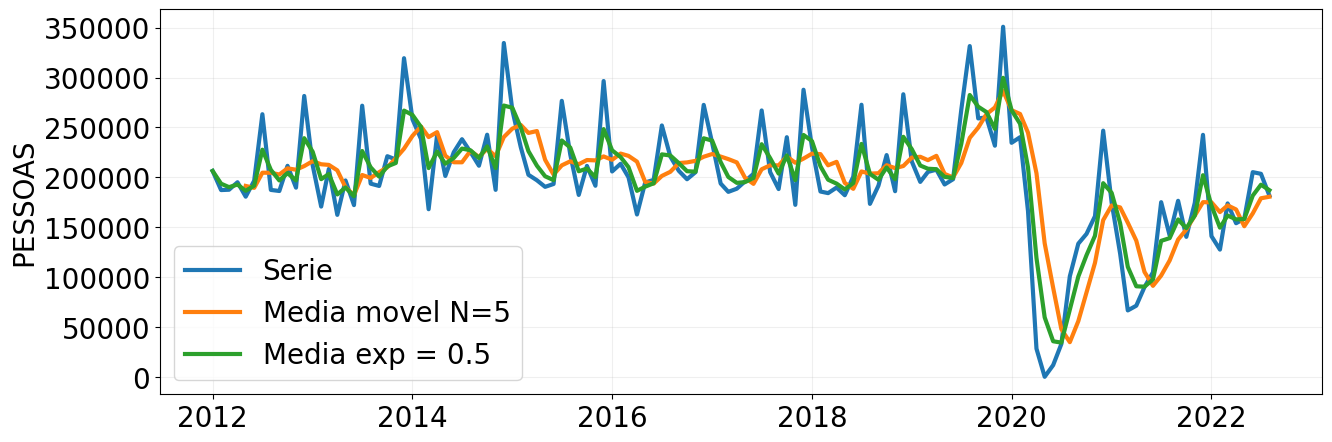

In [28]:
plt.figure(figsize=(15,5))
plt.plot(series2_ajust.index, series2_ajust['PESSOAS'], lw=3, label='Serie')
plt.plot(series2_ajust.index, series2_ajust['PESSOAS'].rolling(5).mean(), lw=3, label='Media movel N=5')
plt.plot(series2_ajust.index, series2_ajust['PESSOAS'].ewm(alpha=0.5).mean(), lw=3, label='Media exp = 0.5')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('PESSOAS', fontsize=20)
plt.grid(alpha=0.2)
plt.legend(fontsize=20)

b. O dado é estacionário?

In [29]:
testeestacionaria(series2_ajust)

'A serie NAO é estacionaria'

c. O dado apresenta uma distribuição normal?

In [30]:
testenormal(series2_ajust)

'A serie NAO é normal'